In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df_nba_og = pd.read_csv('NBA_Stats_71_Years_Updated.csv')

In [5]:
df_nba_og.head(10)

,Rank,Year,Season Start Year,Season Type,Player ID,Player,Team ID,Team,Games Played,Minutes Played,...,Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points Scored,Efficency,AST/TOV,STL/TOV
0,1,1951-52,1951,Regular Season,76056,Paul Arizin,1610612744,PHW,66,2939,...,745,170,NaN,NaN,NaN,250,1674,1786,NaN,NaN
1,2,1951-52,1951,Regular Season,600012,George Mikan,1610612747,MNL,64,2572,...,866,194,NaN,NaN,NaN,286,1523,1592,NaN,NaN
2,3,1951-52,1951,Regular Season,600003,Bob Cousy,1610612738,BOS,66,2681,...,421,441,NaN,NaN,NaN,190,1433,1322,NaN,NaN
3,4,1951-52,1951,Regular Season,77429,Ed Macauley,1610612738,BOS,66,2631,...,529,232,NaN,NaN,NaN,174,1264,1396,NaN,NaN
4,5,1951-52,1951,Regular Season,76514,Bob Davies,1610612758,ROC,65,2394,...,189,390,NaN,NaN,NaN,269,1052,935,NaN,NaN
5,6,1951-52,1951,Regular Season,76250,Frank Brian,1610612765,FTW,66,2672,...,232,233,NaN,NaN,NaN,220,1051,820,NaN,NaN
6,7,1951-52,1951,Regular Season,76744,Larry Foust,1610612765,FTW,66,2615,...,880,200,NaN,NaN,NaN,245,1047,1401,NaN,NaN
7,8,1951-52,1951,Regular Season,78453,Bobby Wanzer,1610612758,ROC,66,2498,...,333,262,NaN,NaN,NaN,201,1033,1144,NaN,NaN
8,9,1951-52,1951,Regular Season,77967,Arnie Risen,1610612758,ROC,66,2396,...,841,150,NaN,NaN,NaN,258,1032,1333,NaN,NaN
9,10,1951-52,1951,Regular Season,77593,Vern Mikkelsen,1610612747,MNL,66,2345,...,681,180,NaN,NaN,NaN,282,1009,1278,NaN,NaN


In [6]:
df_nba_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33330 entries, 0 to 33329
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                33330 non-null  int64  
 1   Year                33330 non-null  object 
 2   Season Start Year   33330 non-null  int64  
 3   Season Type         33330 non-null  object 
 4   Player ID           33330 non-null  int64  
 5   Player              33330 non-null  object 
 6   Team ID             33330 non-null  int64  
 7   Team                33330 non-null  object 
 8   Games Played        33330 non-null  int64  
 9   Minutes Played      33330 non-null  int64  
 10  FG Made             33330 non-null  int64  
 11  FG Attempts         33330 non-null  int64  
 12  FG %                33330 non-null  float64
 13  3-Pt FG Made        27034 non-null  float64
 14  3-Pt FG Attempts    27034 non-null  float64
 15  3-Pt FG %           27034 non-null  float64
 16  FT M

In [7]:
df_nba_og.isnull().sum()

Rank                     0
Year                     0
Season Start Year        0
Season Type              0
Player ID                0
Player                   0
Team ID                  0
Team                     0
Games Played             0
Minutes Played           0
FG Made                  0
FG Attempts              0
FG %                     0
3-Pt FG Made          6296
3-Pt FG Attempts      6296
3-Pt FG %             6296
FT Made                  0
FT Attempts              0
FT %                     0
Offensive Rebounds    4229
Defensive Rebounds    4229
Rebounds                 0
Assists                  0
Steals                4229
Blocks                4229
Turnovers             5566
Personal Fouls           0
Points Scored            0
Efficency                0
AST/TOV               5566
STL/TOV               5566
dtype: int64

In [8]:
df_nba = df_nba_og.drop(columns=['Team ID','AST/TOV','STL/TOV']).copy()

In [9]:
df_nba = df_nba_og
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33330 entries, 0 to 33329
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                33330 non-null  int64  
 1   Year                33330 non-null  object 
 2   Season Start Year   33330 non-null  int64  
 3   Season Type         33330 non-null  object 
 4   Player ID           33330 non-null  int64  
 5   Player              33330 non-null  object 
 6   Team ID             33330 non-null  int64  
 7   Team                33330 non-null  object 
 8   Games Played        33330 non-null  int64  
 9   Minutes Played      33330 non-null  int64  
 10  FG Made             33330 non-null  int64  
 11  FG Attempts         33330 non-null  int64  
 12  FG %                33330 non-null  float64
 13  3-Pt FG Made        27034 non-null  float64
 14  3-Pt FG Attempts    27034 non-null  float64
 15  3-Pt FG %           27034 non-null  float64
 16  FT M

#### Removing missing values

In [10]:
df_nba['Offensive Rebounds'] = df_nba['Offensive Rebounds'].fillna(df_nba['Offensive Rebounds'].median())
df_nba['Defensive Rebounds'] = df_nba['Defensive Rebounds'].fillna(df_nba['Defensive Rebounds'].median())
df_nba['Steals'] = df_nba['Steals'].fillna(df_nba['Steals'].median())
df_nba['Blocks'] = df_nba['Blocks'].fillna(df_nba['Blocks'].median())
df_nba['Turnovers'] = df_nba['Turnovers'].fillna(df_nba['Turnovers'].median())
df_nba['3-Pt FG Made'] = df_nba['3-Pt FG Made'].fillna(df_nba['3-Pt FG Made'].median())
df_nba['3-Pt FG Attempts'] = df_nba['3-Pt FG Attempts'].fillna(df_nba['3-Pt FG Attempts'].median())
df_nba['3-Pt FG %'] = df_nba['3-Pt FG %'].fillna(df_nba['3-Pt FG %'].median())

In [11]:
num_of_rows = len(df_nba)
(df_nba.isnull().sum()/num_of_rows)*100

Rank                   0.00000
Year                   0.00000
Season Start Year      0.00000
Season Type            0.00000
Player ID              0.00000
Player                 0.00000
Team ID                0.00000
Team                   0.00000
Games Played           0.00000
Minutes Played         0.00000
FG Made                0.00000
FG Attempts            0.00000
FG %                   0.00000
3-Pt FG Made           0.00000
3-Pt FG Attempts       0.00000
3-Pt FG %              0.00000
FT Made                0.00000
FT Attempts            0.00000
FT %                   0.00000
Offensive Rebounds     0.00000
Defensive Rebounds     0.00000
Rebounds               0.00000
Assists                0.00000
Steals                 0.00000
Blocks                 0.00000
Turnovers              0.00000
Personal Fouls         0.00000
Points Scored          0.00000
Efficency              0.00000
AST/TOV               16.69967
STL/TOV               16.69967
dtype: float64

In [12]:
len(df_nba['Player'].unique())

4387

In [13]:
df_nba.head()

,Rank,Year,Season Start Year,Season Type,Player ID,Player,Team ID,Team,Games Played,Minutes Played,...,Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points Scored,Efficency,AST/TOV,STL/TOV
0,1,1951-52,1951,Regular Season,76056,Paul Arizin,1610612744,PHW,66,2939,...,745,170,17.0,7.0,32.0,250,1674,1786,NaN,NaN
1,2,1951-52,1951,Regular Season,600012,George Mikan,1610612747,MNL,64,2572,...,866,194,17.0,7.0,32.0,286,1523,1592,NaN,NaN
2,3,1951-52,1951,Regular Season,600003,Bob Cousy,1610612738,BOS,66,2681,...,421,441,17.0,7.0,32.0,190,1433,1322,NaN,NaN
3,4,1951-52,1951,Regular Season,77429,Ed Macauley,1610612738,BOS,66,2631,...,529,232,17.0,7.0,32.0,174,1264,1396,NaN,NaN
4,5,1951-52,1951,Regular Season,76514,Bob Davies,1610612758,ROC,65,2394,...,189,390,17.0,7.0,32.0,269,1052,935,NaN,NaN


In [14]:
df_nba['Season Start Year'].unique()

array([1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022])

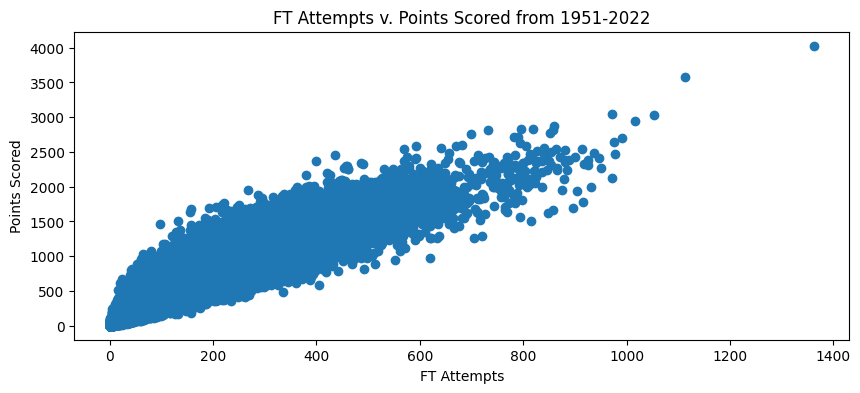

In [15]:
fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(df_nba['FT Attempts'], df_nba['Points Scored'])

ax.set_xlabel('FT Attempts')

ax.set_ylabel('Points Scored')

ax.set_title('FT Attempts v. Points Scored from 1951-2022')
plt.show()

<ipython-input-16-12ee34f2500d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_playoffs['PPG'] = top_playoffs['Points Scored'] / top_playoffs['Games Played']


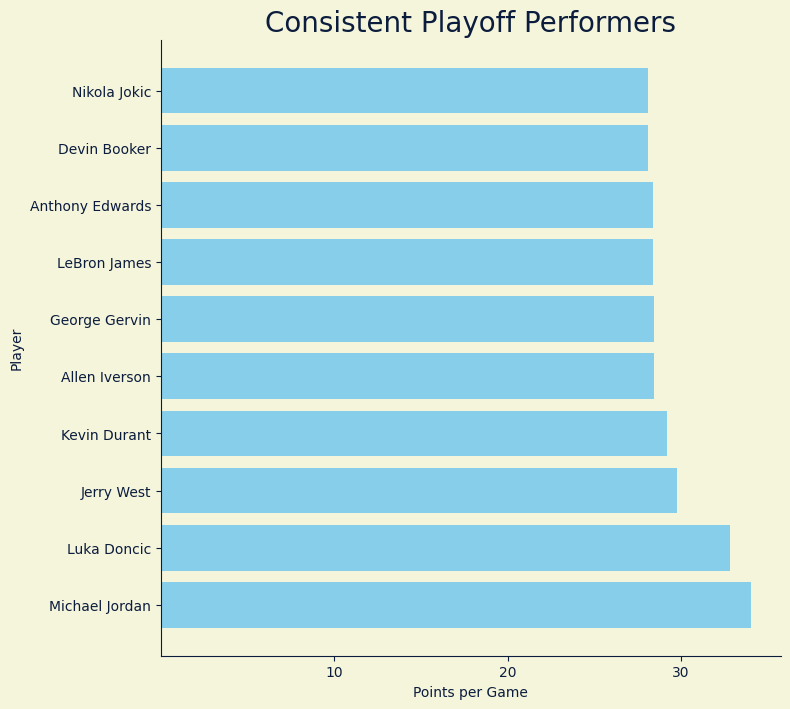

In [16]:
fig, ax = plt.subplots(figsize= (8,8))
top_playoffs = df_nba[(df_nba['Season Type'] == 'Playoffs') & (df_nba['Games Played'] > 2)]
top_playoffs['PPG'] = top_playoffs['Points Scored'] / top_playoffs['Games Played']
top10playoffs = top_playoffs.groupby('Player')['PPG'].mean().sort_values(ascending = False).head(10)

ax.barh(top10playoffs.index, top10playoffs, color = 'skyblue')

ax.set_title('Consistent Playoff Performers', fontsize=20, color = '#0B1C3D')
ax.set_xlabel('Points per Game')
ax.set_ylabel('Player')
ax.set_xticks([10, 20, 30])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.patch.set_facecolor('beige')
ax.set_facecolor('beige')
ax.xaxis.label.set_color('#0B1C3D')
ax.yaxis.label.set_color('#0B1C3D')
ax.tick_params(axis='x',  colors='#0B1C3D')
ax.tick_params(axis='y',  colors='#0B1C3D')
ax.spines['left'].set_color('#0B1C3D')
ax.spines['bottom'].set_color('#0B1C3D')
plt.savefig('nbaplot.png')
